# Отток клиентов

## Цель исследования
Построить модель для задачи классификации, которая спрогнозирeт, уйдёт клиент из банка в ближайшее время или нет.

## Ход исследования

1.  Подготовка данных.На этом этапе будет проведены обзор, оценка качества данных, оценка возможности использовать данные для машинного обучения, предобработка данных, выделим показатели для эффективного обучения моделей, разделеним исходные данные на обучающую, валидационную и тестовую выборки.
2.  Исследование задачи. На этом этапе будем исследовать модели и выбирать наилучшую модель для достижения цели исследования.
3.  Борьба с дисбалансом. На этом этапе будем исследовать методы борьбы с дисбалансом классов целевого показателя и выбирать наилучший метод для достижения цели исследования.
4.  Тестирование модели. На этом этапе мы проверим модель, показавшую более точный результат в результате анализа, выполним проверку модели на адекватность.

## Описание данных
Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.


Предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 


Необходимо построить модель с предельно большим значением *F1*-меры(не менее 0.59), измерить *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Признаки


RowNumber — индекс строки в данных


CustomerId — уникальный идентификатор клиента


Surname — фамилия


CreditScore — кредитный рейтинг


Geography — страна проживания


Gender — пол


Age — возраст


Tenure — сколько лет человек является клиентом банка


Balance — баланс на счёте


NumOfProducts — количество продуктов банка, используемых клиентом


HasCrCard — наличие кредитной карты


IsActiveMember — активность клиента


EstimatedSalary — предполагаемая зарплата


Целевой признак


Exited — факт ухода клиента



## Подготовка данных

Создадим необходимое окружение для работы:

In [1]:
!pip install yellowbrick

In [2]:
!pip install pandas-profiling

In [3]:
!pip install imblearn

In [4]:
import pandas as pd
import numpy as np
from yellowbrick.classifier import ClassificationReport
import pandas_profiling
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from catboost import CatBoostClassifier
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
from phik.report import correlation_report, plot_correlation_matrix

from sklearn.utils import shuffle
from sklearn.dummy import DummyClassifier
import sweetviz as sv

import warnings
warnings.filterwarnings('ignore')

### Ознакомление с данными

In [5]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/Churn.csv')
df.sample(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
5727,5728,15704168,Ting,535,Germany,Male,38,8.0,127475.24,1,0,0,60775.76,1
2767,2768,15747265,Huang,598,Germany,Female,27,10.0,171283.91,1,1,1,84136.12,0
37,38,15729599,Lorenzo,804,Spain,Male,33,7.0,76548.60,1,0,1,98453.45,0
7275,7276,15642336,Shaw,669,France,Female,42,9.0,0.00,2,0,0,135630.32,0
4922,4923,15751203,Cattaneo,702,France,Male,26,5.0,56738.47,2,1,1,100442.22,1
7393,7394,15757434,Yang,599,France,Male,28,7.0,119706.22,1,0,0,31190.42,0
6814,6815,15665943,Mai,445,France,Male,25,6.0,0.00,2,1,0,119425.94,0
4507,4508,15587690,Madueke,592,France,Male,28,2.0,116498.22,1,1,0,144290.25,0
8609,8610,15774258,Gorbunov,678,France,Male,40,1.0,0.00,2,1,1,187343.40,0
1921,1922,15638355,Woods,658,France,Female,35,5.0,126397.66,1,0,0,156361.58,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [7]:
report = sv.analyze(df)
report.show_html()

                                             |      | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


После ознакомления с данными выделяем следующее:
1. Мы имеем дело с данными, которые содержат 14 признаков из которых целевой признак Exited — факт ухода клиента. Типы переменных: числовые - 7, категориальные - 7. Количество наблюдений - 10000.
2. Есть пропуски в столбце Tenure — сколько лет человек является клиентом банка. Количество пропусков - 909 - 9,1% пропусков в столбце. От пропусков следует избавиться или заменить, в случае, если данный признак потребуется для машинного обучения.
3. Отсутствуют дубликаты.
4. При подробном рассмотрении целевого признака мы видим, что он имеет 2 значения - 0 и 1. Видим, что данных со значением 0 признака Exited  - 7963 шт. - 	79.6%, данных со значением 1 - 	2037 шт. - 20.4%. Видим, что есть дисбаланс в значений признака Exited.
5. При подробном анализе значений признаков можно сделать следующие выводы: значения признака Surname — фамилия - составляют 2932  уникальных значения и эти данные не помогут обучить модель; значения признаков RowNumber — индекс строки в данных и CustomerId — уникальный идентификатор клиента состоят из уникальных значений. В рамках поставленной задачи признаки RowNumber и CustomerId нам не потребуются.
6. При анализе корреляции признаков с целевым признаком ориентировались на коэффициент корреляции Phik (𝜙k) - это практичный коэффициент корреляции, который последовательно работает между категориальными, порядковыми и интервальными переменными, учитывает нелинейную зависимость и возвращается к коэффициенту корреляции Пирсона в случае двумерного нормального распределения входных данных. На основании данного анализа заключили, что существует крайне слабая корреляция Exited с признаками: RowNumber — индекс строки в данных, CustomerId — уникальный идентификатор клиента, Tenure — сколько лет человек является клиентом банка, HasCrCard — наличие кредитной карты, EstimatedSalary — предполагаемая зарплата.
7. При проверке на  мультиколлинеарность — не было выявлено наличия сильной корреляции между несколькими не целевыми признаками.


Потребуется:
1. Привести для удобства наименование колонок к нижнему регистру. Удалить из данных следующие столбцы:'RowNumber', 'CustomerId', 'Surname', 'Tenure', 'HasCrCard', 'EstimatedSalary'. Удаление данных признаков снизит нагрузку при обучении моделей.
2. В столбцах Geography — (3 уникальных значения France', 'Spain', 'Germany') и Gender -(2 уникальных значения) — выполнить преобразовываем категориальные переменные в фиктивные переменные , которые представляют собой числовые переменные, используемые для представления категориальных данных.
3. Разделить данные на выборки: тестовую, валидационную, для обучения.
4. Произвести масштабирование признаков так как признаки измеряются в разных единицах, а значит покрывают разные диапазоны. Это сильно искажает результаты алгоритмов, которые учитывают расстояния между измерениями.


### Очищаем данные от ненужных признаков
Приведем формат наименования колонок к нижнему регистру.

In [8]:
df.columns = df.columns.str.lower()
df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

Удаляем столбцы на основании анализа данных.

In [9]:
data = df.drop(['rownumber', 'customerid', 'surname','tenure', 'hascrcard', 'estimatedsalary'], axis=1).copy()
data.head()

,creditscore,geography,gender,age,balance,numofproducts,isactivemember,exited
0,619,France,Female,42,0.00,1,1,1
1,608,Spain,Female,41,83807.86,1,1,0
2,502,France,Female,42,159660.80,3,0,1
3,699,France,Female,39,0.00,2,0,0
4,850,Spain,Female,43,125510.82,1,1,0


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   creditscore     10000 non-null  int64  
 1   geography       10000 non-null  object 
 2   gender          10000 non-null  object 
 3   age             10000 non-null  int64  
 4   balance         10000 non-null  float64
 5   numofproducts   10000 non-null  int64  
 6   isactivemember  10000 non-null  int64  
 7   exited          10000 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 625.1+ KB


Количество признаков сокращено верно, количество наблюдений не изменилось.

Еще раз посмотрим на коэффициент корреляции Phik (𝜙k) признаков и целевого признака.

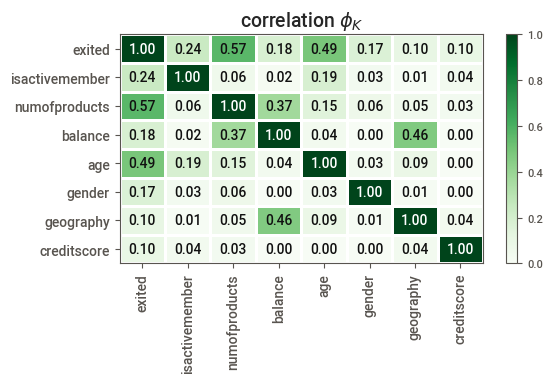

In [11]:
interval_cols = data.select_dtypes('number').columns.tolist()
phik_overview = data.phik_matrix(interval_cols=interval_cols)
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1, 
                        figsize=(6, 4))
plt.tight_layout()

Нулевой корреляции с целевым признаком не обнаружено.

### Преобразование категориальных переменных
Кодирование категориальных признаков не считает на обучающей выборке никаких параметров, поэтому, его можно применять сразу ко всему датасету.

In [12]:
cat_columns = data.select_dtypes('object').columns
ohe = OneHotEncoder(sparse=False, drop='first')
df_ohe = ohe.fit_transform(data[cat_columns])
df_ohe = pd.DataFrame(df_ohe, columns=ohe.get_feature_names())
data[ohe.get_feature_names()] = df_ohe 
data.drop(columns=cat_columns, inplace=True)
data

,creditscore,age,balance,numofproducts,isactivemember,exited,x0_Germany,x0_Spain,x1_Male
0,619,42,0.00,1,1,1,0.0,0.0,0.0
1,608,41,83807.86,1,1,0,0.0,1.0,0.0
2,502,42,159660.80,3,0,1,0.0,0.0,0.0
3,699,39,0.00,2,0,0,0.0,0.0,0.0
4,850,43,125510.82,1,1,0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...
9995,771,39,0.00,2,0,0,0.0,0.0,1.0
9996,516,35,57369.61,1,1,0,0.0,0.0,1.0
9997,709,36,0.00,1,1,1,0.0,0.0,0.0
9998,772,42,75075.31,2,0,1,1.0,0.0,1.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   creditscore     10000 non-null  int64  
 1   age             10000 non-null  int64  
 2   balance         10000 non-null  float64
 3   numofproducts   10000 non-null  int64  
 4   isactivemember  10000 non-null  int64  
 5   exited          10000 non-null  int64  
 6   x0_Germany      10000 non-null  float64
 7   x0_Spain        10000 non-null  float64
 8   x1_Male         10000 non-null  float64
dtypes: float64(4), int64(5)
memory usage: 703.2 KB


Видим, что все данные содержат числовые значения и исключена мультиколлинеарность.

### Разделяем данные на выборки: тестовую, валидационную, для обучения
Разделим данные на целевую переменную и целевые признаки.

In [14]:
X = data.drop('exited', axis=1)#целевые признаки features

y = data['exited']#целевая переменная target

Все прочие разделения данных будем проводить с учетом дисбаланса классов.

Выделим тестовую выборку.

In [15]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.4, random_state=12345, stratify=y)

Выделим валидационную и обучающую выборки.

In [16]:
X_valid, X_test, y_valid, y_test = train_test_split(X_valid, y_valid, 
                                                    test_size=0.5, random_state=12345, stratify=y_valid)

In [17]:
print('Размер обучающей выборки', len(X_train), ", доля объектов", round((len(X_train)/len(data)*100), 2),'%.')
print('Размер валидационной выборки', len(X_valid), ", доля объектов", round((len(X_valid)/len(data)*100), 2),'%.')
print('Размер тестовой выборки', len(X_test), ", доля объектов", round((len(X_test)/len(data)*100), 2),'%.')

Размер обучающей выборки 6000 , доля объектов 60.0 %.
Размер валидационной выборки 2000 , доля объектов 20.0 %.
Размер тестовой выборки 2000 , доля объектов 20.0 %.


### Масштабирование признаков

Масштабирование нельзя обучать одновременно на данных из обучения и теста, иначе, подсчитанные на тесте метрики качества будут давать смещённые оценки на качество работы алгоритма.

In [18]:
#Для масштабирования зафиксируем численные признаки
numeric = ['creditscore', 'age', 'balance', 'numofproducts']
#Создадим объект этой структуры и настроим его на обучающих данных:
scaler = StandardScaler()
scaler.fit(X_train[numeric])
#Масштабируем численные признаки обучающей выборки 
X_train[numeric] = scaler.transform(X_train[numeric])
X_train.head()

,creditscore,age,balance,numofproducts,isactivemember,x0_Germany,x0_Spain,x1_Male
2837,-1.040434,0.953312,0.774657,-0.914708,1,1.0,0.0,0.0
9925,0.454006,-0.095244,1.910540,-0.914708,1,0.0,0.0,0.0
8746,0.103585,-0.476537,0.481608,0.820981,1,0.0,0.0,1.0
660,-0.184996,0.190726,0.088439,-0.914708,1,1.0,0.0,0.0
3610,-0.720933,1.620574,0.879129,-0.914708,0,0.0,0.0,0.0


In [19]:
#Масштабируем численные признаки валидирующей выборки 
X_valid[numeric] = scaler.transform(X_valid[numeric])
X_valid.head()

,creditscore,age,balance,numofproducts,isactivemember,x0_Germany,x0_Spain,x1_Male
6612,-1.524838,2.383160,1.011655,-0.914708,1,0.0,0.0,0.0
519,0.587990,1.811221,0.213192,-0.914708,1,0.0,0.0,1.0
1609,-0.318980,-0.381213,0.893896,-0.914708,0,0.0,0.0,0.0
3475,1.226991,-0.762506,-0.240363,0.820981,1,0.0,0.0,1.0
2707,-0.133464,-0.095244,0.447305,-0.914708,0,0.0,0.0,0.0


In [20]:
#Масштабируем численные признаки тестовой выборки 
X_test[numeric] = scaler.transform(X_test[numeric])
X_test.head()

,creditscore,age,balance,numofproducts,isactivemember,x0_Germany,x0_Spain,x1_Male
657,-0.504497,1.429928,0.873883,0.820981,1,1.0,0.0,0.0
2083,-1.195031,-1.429769,-1.219673,-0.914708,1,0.0,0.0,1.0
3234,-1.267176,0.762665,-1.219673,-0.914708,0,0.0,0.0,1.0
1551,0.825039,1.239281,-1.219673,0.820981,1,0.0,1.0,0.0
2344,0.660135,0.953312,0.267087,-0.914708,0,1.0,0.0,0.0


### Итоги подготовки данных
1. Было проведено ознакомление с данными, в результате которого были удалены колонки и признаками, которые не потребуются для обучения моделей. Удалены, чтобы не перегружать модели. 
2. Были преобразованы категориальные значения признаков в числовые.
3. Данные были разделены на выборки: для обучения, валидационную и тестовую. Разделение было проведено с учетом дисбаланса значений целевого признака.
4. Было проведено масштабирование признаков выборок.


Данные подготовлены для исследования. Далее мы проанализируем какие алгоритмы лучше будут лучше подходить для построения модели с большим значением F1-меры.


Для дальнейшей работы выберем алгоритмы машинного обучения:

1. логистическая регрессия;
2. деревья решений;
3. случайный лес;
4. CatBoost.
Рассмотрим модели и подберем гиперпараметры.

Для каждой модели будем определять:
1. precision (точность) — эта метрика показывает, насколько мы можем доверять модели, другими словами, какое у нас количество «ложных срабатываний». Значение метрики равно отношению числа ответов, которые модель считает правильными, и они действительно были правильными (это число обозначается «true positives») к сумме «true positives» и числа объектов которые модель посчитала правильными, а на самом деле они были неправильные (это число обозначается «false positives»). В виде формулы: precision = «true positives» / («true positives» + «false positives»). 
2. recall (полнота) — эта метрика показывает насколько модель может вообще обнаруживать правильные ответы, другими словами, какое у нас количество «ложных пропусков». Ее численное значение равно отношению ответов, которые модель считает правильными, и они действительно были правильными к числу всех правильных ответов в выборке. В виде формулы: recall = «true positives» / «all positives». 
3. f1-score (f-мера) — это объединение precision и recall.достигает максимума в 1 при recall и precision, равных 1, и близка к 0, если хотя бы одна из метрик устремлена к 0. support — просто число найденных объектов в классе. 

Чтобы упростить интерпретацию и обнаружение проблем, отчет объединяет числовые оценки с цветовой тепловой картой. Все тепловые карты находятся в диапазоне (0,0, 1,0), чтобы упростить сравнение моделей классификации в разных отчетах о классификации.(если precision и recall больше 0.85, то это хорошая модель, если больше 0.95, то отличная.).

4. Чтобы выявить, как сильно наши модели отличается от случайной, посчитаем площадь под ROC-кривой — AUC-ROC (от англ. Area Under Curve ROC, «площадь под ROC-кривой»). Это метрика качества, которая изменяется от 0 до 1. AUC-ROC случайной модели равна 0.5. 


## Исследование задачи

In [21]:
#для удобства вывода в дальнейшем - соберем лучшие показатели точности в списки
table_of_f1_score = []
table_of_roc_auc_score = []
table_of_model = []

### Логистическая регрессия
Рассмотрим модель без настроек гиперпараметров.

In [22]:
model = LogisticRegression(random_state=12345)
model.fit(X_train, y_train)


valid_predictions = model.predict(X_valid)
valid_f1_score = f1_score(y_valid, valid_predictions)
valid_roc_auc_score= roc_auc_score(y_valid, valid_predictions)

print("Показатель F1 валидационной выборки без настроек гиперпараметров модели логистической регрессии:", valid_f1_score)
print("Показатель AUC-ROC валидационной выборки без настроек гиперпараметров модели логистической регрессии:", valid_roc_auc_score)

Показатель F1 валидационной выборки без настроек гиперпараметров модели логистической регрессии: 0.3107861060329068
Показатель AUC-ROC валидационной выборки без настроек гиперпараметров модели логистической регрессии: 0.5872068676716917


Попробуем подобрать гиперпараметры и улучшить значения показателей.

In [23]:
grid = {'penalty':['l1', 'l2', 'elasticnet', 'none'],
        'C':[1.0, 1.2, 1.5, 0.5],
        'solver':['newton-cg', 'lbfgs', 'liblinear' 'sag', 'saga'],
        'intercept_scaling':[1.0, 1.2, 1.5, 0.5]}
model = LogisticRegression(random_state=42)

grid_search = GridSearchCV(model, grid, cv=5,
                           scoring='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [1.0, 1.2, 1.5, 0.5],
                         'intercept_scaling': [1.0, 1.2, 1.5, 0.5],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinearsag',
                                    'saga']},
             scoring='f1')

In [24]:
grid_search.best_params_

{'C': 1.0, 'intercept_scaling': 1.0, 'penalty': 'none', 'solver': 'newton-cg'}

Рассмотрим модель с настройкой гиперпараметров.

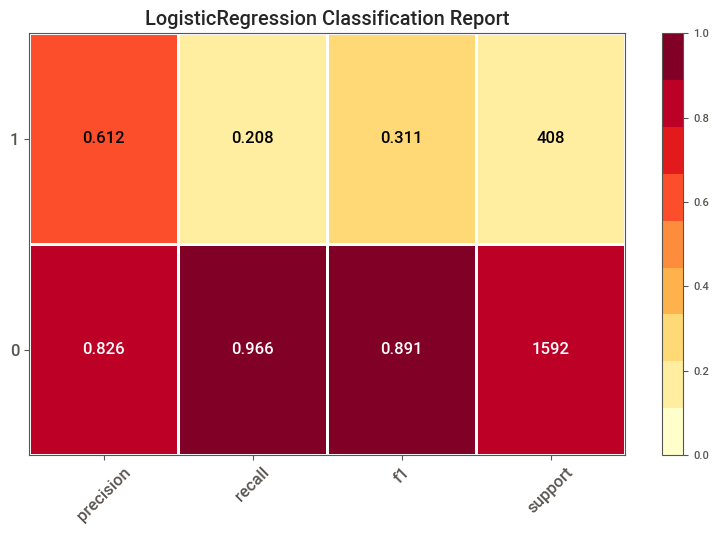

Показатель F1 валидационной выборки с настройками гиперпараметров модели логистической регрессии: 0.3107861060329068
Показатель AUC-ROC валидационной выборки с настройками гиперпараметров модели логистической регрессии: 0.5872068676716917


In [25]:
model_logistic = LogisticRegression(random_state=12345, C=1.0, intercept_scaling=1.0, penalty='none', 
                                    solver='newton-cg')
model_logistic.fit(X_train, y_train)


valid_predictions = model_logistic.predict(X_valid)
valid_f1_score = f1_score(y_valid, valid_predictions)
valid_roc_auc_score= roc_auc_score(y_valid, valid_predictions)

# Specify the target classes
classes = ["0","1"]

# Instantiate the classification model and visualizer
model = model_logistic
visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_valid, y_valid)        # Evaluate the model on the valid data
visualizer.show()                       # Finalize and show the figure


print("Показатель F1 валидационной выборки с настройками гиперпараметров модели логистической регрессии:", valid_f1_score)
print("Показатель AUC-ROC валидационной выборки с настройками гиперпараметров модели логистической регрессии:", valid_roc_auc_score)

table_of_f1_score.append(round(valid_f1_score, 3))
table_of_roc_auc_score.append(round(valid_roc_auc_score, 3))
table_of_model.append('LogisticRegression')

Значение показателя F1 достаточно низкое, настройка гиперпараметров не позволила улучшить результат. Показатель AUC-ROC близок к значению, характерному для случайной модели. Видим, что модель сильно несбалансирована.

### Деревья решений
Рассмотрим модель  без настроек гиперпараметров.

In [26]:
model = DecisionTreeClassifier(random_state=12345)
model.fit(X_train, y_train)


valid_predictions = model.predict(X_valid)
valid_f1_score = f1_score(y_valid, valid_predictions)
valid_roc_auc_score= roc_auc_score(y_valid, valid_predictions)

print("Показатель F1 валидационной выборки без настроек гиперпараметров модели дерево решений:", valid_f1_score)
print("Показатель AUC-ROC валидационной выборки без настроек гиперпараметров модели дерево решений:", valid_roc_auc_score)

Показатель F1 валидационной выборки без настроек гиперпараметров модели дерево решений: 0.5458879618593563
Показатель AUC-ROC валидационной выборки без настроек гиперпараметров модели дерево решений: 0.7171950438466844


Подберем гиперпараметры.

In [27]:
grid = {'criterion':['gini', 'entropy', 'log_loss'],
        'splitter':['best', 'random'],
        'max_depth':range(2, 31),
        'min_samples_split':range(2, 20),
        'min_samples_leaf':range(2, 4)
       }
model = DecisionTreeClassifier(random_state=12345)

grid_search = GridSearchCV(model, grid, cv=5,
                           scoring='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=12345),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(2, 31),
                         'min_samples_leaf': range(2, 4),
                         'min_samples_split': range(2, 20),
                         'splitter': ['best', 'random']},
             scoring='f1')

In [28]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 16,
 'min_samples_leaf': 3,
 'min_samples_split': 19,
 'splitter': 'random'}

Рассмотрим модель с настройкой гиперпараметров.

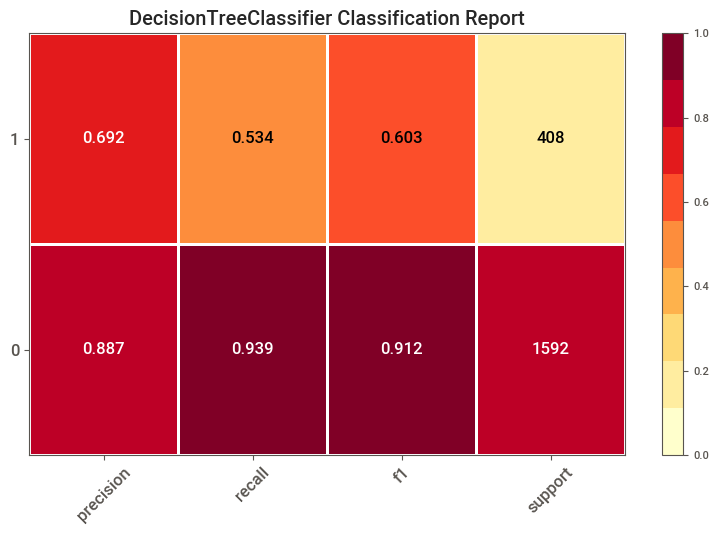

Показатель F1 валидационной выборки с настройками гиперпараметров модели дерево решений: 0.603042876901798
Показатель AUC-ROC валидационной выборки с настройками гиперпараметров модели дерево решений: 0.736692038624495


In [29]:
model_tree = DecisionTreeClassifier(random_state=12345, criterion='gini', max_depth=16,
                               min_samples_leaf=3, min_samples_split=19, splitter='random')
model_tree.fit(X_train, y_train)

valid_predictions = model_tree.predict(X_valid)
valid_f1_score = f1_score(y_valid, valid_predictions)
valid_roc_auc_score= roc_auc_score(y_valid, valid_predictions)

# Specify the target classes
classes = ["0","1"]

# Instantiate the classification model and visualizer
model = model_tree
visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_valid, y_valid)        # Evaluate the model on the valid data
visualizer.show()                       # Finalize and show the figure

print("Показатель F1 валидационной выборки с настройками гиперпараметров модели дерево решений:", valid_f1_score)
print("Показатель AUC-ROC валидационной выборки с настройками гиперпараметров модели дерево решений:", valid_roc_auc_score)
table_of_f1_score.append(round(valid_f1_score, 3))
table_of_roc_auc_score.append(round(valid_roc_auc_score, 3))
table_of_model.append('DecisionTreeClassifier')

Настройка гиперпараметров позволила повысить значение F1 и AUC-ROC. Модель сбалансирована лучше, относительно LogisticRegression.

### Случайный лес
Рассмотрим модель без настроек гиперпараметров.

In [30]:
model = RandomForestClassifier(random_state=12345)
model.fit(X_train, y_train)


valid_predictions = model.predict(X_valid)
valid_f1_score = f1_score(y_valid, valid_predictions)
valid_roc_auc_score= roc_auc_score(y_valid, valid_predictions)

print("Показатель F1 валидационной выборки без настроек гиперпараметров модели случайный лес:", valid_f1_score)
print("Показатель AUC-ROC валидационной выборки без настроек гиперпараметров модели случайный лес:", valid_roc_auc_score)

Показатель F1 валидационной выборки без настроек гиперпараметров модели случайный лес: 0.6037195994277539
Показатель AUC-ROC валидационной выборки без настроек гиперпараметров модели случайный лес: 0.7334528032318455


Подберем гиперпараметры.

In [31]:
grid = {'n_estimators':range(1, 61, 5),
        'criterion': ['gini', 'entropy', 'log_loss'],
        'min_samples_split': range(2, 32, 5),
        'max_depth':range(1, 31, 5),
        }
model = RandomForestClassifier(random_state=12345)

grid_search = GridSearchCV(model, grid, cv=5,
                           scoring='f1')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=12345),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': range(1, 31, 5),
                         'min_samples_split': range(2, 32, 5),
                         'n_estimators': range(1, 61, 5)},
             scoring='f1')

In [32]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 21,
 'min_samples_split': 12,
 'n_estimators': 21}

Рассмотрим модель с настройкой гиперпараметров.

Показатель F1 валидационной выборки с настройками гиперпараметров модели случайный лес: 0.5894428152492668
Показатель AUC-ROC валидационной выборки с настройками гиперпараметров модели случайный лес: 0.7233963937333727


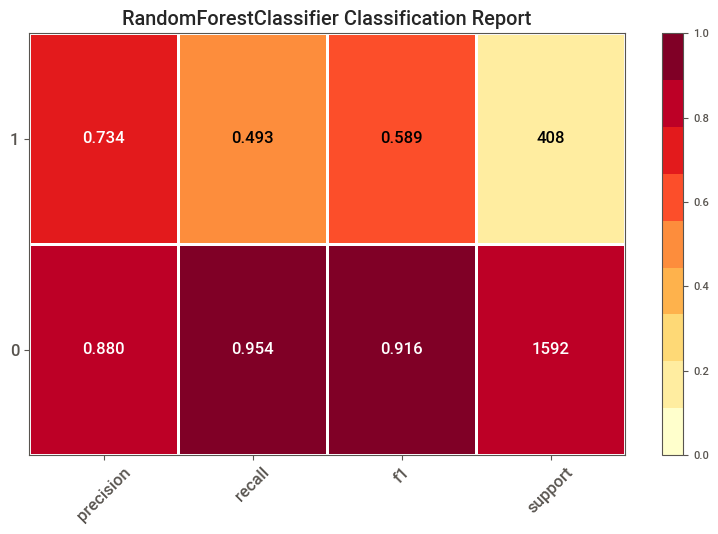

Показатель F1 валидационной выборки с настройками гиперпараметров модели случайный лес: 0.5894428152492668
Показатель AUC-ROC валидационной выборки с настройками гиперпараметров модели случайный лес: 0.7233963937333727


In [33]:
model_forest = RandomForestClassifier(random_state=12345, criterion='gini', 
                                      min_samples_split=12, n_estimators=21, max_depth=21)
model_forest.fit(X_train, y_train)


valid_predictions = model_forest.predict(X_valid)
valid_f1_score = f1_score(y_valid, valid_predictions)
valid_roc_auc_score= roc_auc_score(y_valid, valid_predictions)

print("Показатель F1 валидационной выборки с настройками гиперпараметров модели случайный лес:", valid_f1_score)
print("Показатель AUC-ROC валидационной выборки с настройками гиперпараметров модели случайный лес:", valid_roc_auc_score)
table_of_f1_score.append(round(valid_f1_score, 3))
table_of_roc_auc_score.append(round(valid_roc_auc_score, 3))
table_of_model.append('RandomForestClassifier')


# Specify the target classes
classes = ["0","1"]

# Instantiate the classification model and visualizer
model = model_forest
visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_valid, y_valid)        # Evaluate the model on the valid data
visualizer.show()                       # Finalize and show the figure

print("Показатель F1 валидационной выборки с настройками гиперпараметров модели случайный лес:", valid_f1_score)
print("Показатель AUC-ROC валидационной выборки с настройками гиперпараметров модели случайный лес:", valid_roc_auc_score)
table_of_f1_score.append(round(valid_f1_score, 3))
table_of_roc_auc_score.append(round(valid_roc_auc_score, 3))
table_of_model.append('RandomForestClassifier')

 Показатели модели выше среднего. Настройка гиперпараметров не позволила повысить значение F1 и AUV-ROC. Сбалансированность модели выше чем LogisticRegression.

### CatBoost
Рассмотрим модель без настроек гиперпараметров.

In [34]:
model = CatBoostClassifier(random_state=12345)
model.fit(X_train, y_train)


valid_predictions = model.predict(X_valid)
valid_f1_score = f1_score(y_valid, valid_predictions)
valid_roc_auc_score= roc_auc_score(y_valid, valid_predictions)

print("Параметр F1 валидационной выборки без настроек гиперпараметров модели CatBoost:", valid_f1_score)
print("Параметр AUC-ROC валидационной выборки без настроек гиперпараметров модели CatBoost:", valid_roc_auc_score)

Learning rate set to 0.022141
0:	learn: 0.6748249	total: 61.4ms	remaining: 1m 1s
1:	learn: 0.6573829	total: 63.5ms	remaining: 31.7s
2:	learn: 0.6402297	total: 64.9ms	remaining: 21.6s
3:	learn: 0.6268394	total: 66.2ms	remaining: 16.5s
4:	learn: 0.6127492	total: 67.5ms	remaining: 13.4s
5:	learn: 0.5987692	total: 68.7ms	remaining: 11.4s
6:	learn: 0.5862362	total: 70.4ms	remaining: 9.99s
7:	learn: 0.5738965	total: 71.6ms	remaining: 8.88s
8:	learn: 0.5644834	total: 72.7ms	remaining: 8.01s
9:	learn: 0.5528771	total: 74.2ms	remaining: 7.34s
10:	learn: 0.5422780	total: 76ms	remaining: 6.83s
11:	learn: 0.5338839	total: 77.3ms	remaining: 6.37s
12:	learn: 0.5245262	total: 80.1ms	remaining: 6.08s
13:	learn: 0.5173270	total: 81.4ms	remaining: 5.74s
14:	learn: 0.5085118	total: 82.8ms	remaining: 5.44s
15:	learn: 0.5002713	total: 84.4ms	remaining: 5.19s
16:	learn: 0.4925026	total: 86.6ms	remaining: 5.01s
17:	learn: 0.4852425	total: 88.1ms	remaining: 4.81s
18:	learn: 0.4797955	total: 89.5ms	remaining: 

171:	learn: 0.3191757	total: 360ms	remaining: 1.73s
172:	learn: 0.3190734	total: 362ms	remaining: 1.73s
173:	learn: 0.3189729	total: 364ms	remaining: 1.73s
174:	learn: 0.3187325	total: 366ms	remaining: 1.72s
175:	learn: 0.3186276	total: 368ms	remaining: 1.72s
176:	learn: 0.3183879	total: 369ms	remaining: 1.72s
177:	learn: 0.3182583	total: 372ms	remaining: 1.72s
178:	learn: 0.3180560	total: 374ms	remaining: 1.71s
179:	learn: 0.3179710	total: 375ms	remaining: 1.71s
180:	learn: 0.3178705	total: 376ms	remaining: 1.7s
181:	learn: 0.3177465	total: 378ms	remaining: 1.7s
182:	learn: 0.3176890	total: 379ms	remaining: 1.69s
183:	learn: 0.3175192	total: 382ms	remaining: 1.69s
184:	learn: 0.3173430	total: 384ms	remaining: 1.69s
185:	learn: 0.3171272	total: 385ms	remaining: 1.69s
186:	learn: 0.3169455	total: 387ms	remaining: 1.68s
187:	learn: 0.3167739	total: 390ms	remaining: 1.68s
188:	learn: 0.3165359	total: 391ms	remaining: 1.68s
189:	learn: 0.3164163	total: 394ms	remaining: 1.68s
190:	learn: 0.

340:	learn: 0.3008896	total: 658ms	remaining: 1.27s
341:	learn: 0.3008185	total: 660ms	remaining: 1.27s
342:	learn: 0.3007127	total: 662ms	remaining: 1.27s
343:	learn: 0.3005706	total: 664ms	remaining: 1.26s
344:	learn: 0.3004493	total: 666ms	remaining: 1.26s
345:	learn: 0.3003954	total: 667ms	remaining: 1.26s
346:	learn: 0.3003782	total: 670ms	remaining: 1.26s
347:	learn: 0.3002970	total: 671ms	remaining: 1.26s
348:	learn: 0.3002616	total: 673ms	remaining: 1.25s
349:	learn: 0.3001273	total: 675ms	remaining: 1.25s
350:	learn: 0.3000246	total: 676ms	remaining: 1.25s
351:	learn: 0.2999581	total: 678ms	remaining: 1.25s
352:	learn: 0.2998644	total: 679ms	remaining: 1.25s
353:	learn: 0.2997511	total: 681ms	remaining: 1.24s
354:	learn: 0.2996472	total: 683ms	remaining: 1.24s
355:	learn: 0.2995948	total: 684ms	remaining: 1.24s
356:	learn: 0.2995093	total: 686ms	remaining: 1.24s
357:	learn: 0.2993742	total: 687ms	remaining: 1.23s
358:	learn: 0.2992826	total: 689ms	remaining: 1.23s
359:	learn: 

505:	learn: 0.2862984	total: 947ms	remaining: 925ms
506:	learn: 0.2861803	total: 949ms	remaining: 923ms
507:	learn: 0.2861172	total: 951ms	remaining: 921ms
508:	learn: 0.2860518	total: 953ms	remaining: 919ms
509:	learn: 0.2859850	total: 954ms	remaining: 917ms
510:	learn: 0.2858642	total: 956ms	remaining: 915ms
511:	learn: 0.2857495	total: 958ms	remaining: 913ms
512:	learn: 0.2856424	total: 959ms	remaining: 911ms
513:	learn: 0.2855503	total: 962ms	remaining: 910ms
514:	learn: 0.2854943	total: 963ms	remaining: 907ms
515:	learn: 0.2854395	total: 964ms	remaining: 904ms
516:	learn: 0.2853740	total: 966ms	remaining: 902ms
517:	learn: 0.2852842	total: 967ms	remaining: 900ms
518:	learn: 0.2851797	total: 968ms	remaining: 897ms
519:	learn: 0.2850383	total: 969ms	remaining: 895ms
520:	learn: 0.2849037	total: 970ms	remaining: 892ms
521:	learn: 0.2848358	total: 973ms	remaining: 891ms
522:	learn: 0.2847250	total: 974ms	remaining: 888ms
523:	learn: 0.2846566	total: 976ms	remaining: 887ms
524:	learn: 

666:	learn: 0.2723636	total: 1.24s	remaining: 621ms
667:	learn: 0.2722922	total: 1.24s	remaining: 619ms
668:	learn: 0.2722311	total: 1.25s	remaining: 617ms
669:	learn: 0.2721657	total: 1.25s	remaining: 614ms
670:	learn: 0.2720773	total: 1.25s	remaining: 612ms
671:	learn: 0.2720316	total: 1.25s	remaining: 611ms
672:	learn: 0.2719663	total: 1.25s	remaining: 609ms
673:	learn: 0.2718855	total: 1.25s	remaining: 607ms
674:	learn: 0.2718051	total: 1.26s	remaining: 605ms
675:	learn: 0.2716914	total: 1.26s	remaining: 603ms
676:	learn: 0.2716081	total: 1.26s	remaining: 601ms
677:	learn: 0.2715257	total: 1.26s	remaining: 599ms
678:	learn: 0.2714463	total: 1.26s	remaining: 598ms
679:	learn: 0.2713589	total: 1.26s	remaining: 596ms
680:	learn: 0.2712906	total: 1.27s	remaining: 594ms
681:	learn: 0.2712402	total: 1.27s	remaining: 592ms
682:	learn: 0.2711639	total: 1.27s	remaining: 590ms
683:	learn: 0.2710658	total: 1.27s	remaining: 588ms
684:	learn: 0.2709670	total: 1.27s	remaining: 586ms
685:	learn: 

840:	learn: 0.2599505	total: 1.54s	remaining: 291ms
841:	learn: 0.2599067	total: 1.54s	remaining: 290ms
842:	learn: 0.2598220	total: 1.54s	remaining: 288ms
843:	learn: 0.2597691	total: 1.55s	remaining: 286ms
844:	learn: 0.2597141	total: 1.55s	remaining: 284ms
845:	learn: 0.2596815	total: 1.55s	remaining: 282ms
846:	learn: 0.2595948	total: 1.55s	remaining: 281ms
847:	learn: 0.2594973	total: 1.55s	remaining: 279ms
848:	learn: 0.2593972	total: 1.56s	remaining: 277ms
849:	learn: 0.2593418	total: 1.56s	remaining: 275ms
850:	learn: 0.2592600	total: 1.56s	remaining: 273ms
851:	learn: 0.2592172	total: 1.56s	remaining: 271ms
852:	learn: 0.2591835	total: 1.56s	remaining: 269ms
853:	learn: 0.2591182	total: 1.56s	remaining: 268ms
854:	learn: 0.2590700	total: 1.57s	remaining: 266ms
855:	learn: 0.2590372	total: 1.57s	remaining: 264ms
856:	learn: 0.2589665	total: 1.57s	remaining: 262ms
857:	learn: 0.2589088	total: 1.57s	remaining: 260ms
858:	learn: 0.2588234	total: 1.57s	remaining: 258ms
859:	learn: 

997:	learn: 0.2494484	total: 1.83s	remaining: 3.68ms
998:	learn: 0.2493910	total: 1.84s	remaining: 1.84ms
999:	learn: 0.2493444	total: 1.84s	remaining: 0us
Параметр F1 валидационной выборки без настроек гиперпараметров модели CatBoost: 0.6116642958748222
Параметр AUC-ROC валидационной выборки без настроек гиперпараметров модели CatBoost: 0.7383547640161592


Подберем гиперпараметры.

In [35]:
grid = {'metric_period':[10, 50, 100],
        'verbose': [10, 50, 100]
        }
model = CatBoostClassifier(random_state=12345)

grid_search = GridSearchCV(model, grid, cv=5,
                           scoring='f1')
grid_search.fit(X_train, y_train)

Learning rate set to 0.020129
0:	learn: 0.6793776	total: 1.4ms	remaining: 1.4s
10:	learn: 0.5542514	total: 12.2ms	remaining: 1.1s
20:	learn: 0.4792818	total: 27.4ms	remaining: 1.28s
30:	learn: 0.4331712	total: 41.5ms	remaining: 1.3s
40:	learn: 0.4011398	total: 57.2ms	remaining: 1.34s
50:	learn: 0.3788905	total: 71.1ms	remaining: 1.32s
60:	learn: 0.3654237	total: 82.2ms	remaining: 1.26s
70:	learn: 0.3542633	total: 103ms	remaining: 1.35s
80:	learn: 0.3463180	total: 114ms	remaining: 1.29s
90:	learn: 0.3405427	total: 125ms	remaining: 1.24s
100:	learn: 0.3360671	total: 142ms	remaining: 1.26s
110:	learn: 0.3322270	total: 157ms	remaining: 1.25s
120:	learn: 0.3294197	total: 171ms	remaining: 1.24s
130:	learn: 0.3265305	total: 188ms	remaining: 1.25s
140:	learn: 0.3238023	total: 204ms	remaining: 1.24s
150:	learn: 0.3218533	total: 219ms	remaining: 1.23s
160:	learn: 0.3203353	total: 237ms	remaining: 1.23s
170:	learn: 0.3181474	total: 251ms	remaining: 1.22s
180:	learn: 0.3166637	total: 267ms	remaini

570:	learn: 0.2781092	total: 885ms	remaining: 665ms
580:	learn: 0.2772312	total: 901ms	remaining: 650ms
590:	learn: 0.2763400	total: 916ms	remaining: 634ms
600:	learn: 0.2752414	total: 931ms	remaining: 618ms
610:	learn: 0.2742942	total: 947ms	remaining: 603ms
620:	learn: 0.2729677	total: 962ms	remaining: 587ms
630:	learn: 0.2721917	total: 976ms	remaining: 571ms
640:	learn: 0.2711633	total: 992ms	remaining: 555ms
650:	learn: 0.2703395	total: 1.01s	remaining: 540ms
660:	learn: 0.2695220	total: 1.02s	remaining: 525ms
670:	learn: 0.2687552	total: 1.04s	remaining: 510ms
680:	learn: 0.2679997	total: 1.05s	remaining: 493ms
690:	learn: 0.2670826	total: 1.08s	remaining: 483ms
700:	learn: 0.2664094	total: 1.1s	remaining: 468ms
710:	learn: 0.2655553	total: 1.11s	remaining: 452ms
720:	learn: 0.2645216	total: 1.13s	remaining: 436ms
730:	learn: 0.2636453	total: 1.14s	remaining: 420ms
740:	learn: 0.2627906	total: 1.16s	remaining: 404ms
750:	learn: 0.2619220	total: 1.17s	remaining: 388ms
760:	learn: 0

160:	learn: 0.3203375	total: 254ms	remaining: 1.32s
170:	learn: 0.3184141	total: 273ms	remaining: 1.32s
180:	learn: 0.3166528	total: 299ms	remaining: 1.35s
190:	learn: 0.3146725	total: 341ms	remaining: 1.44s
200:	learn: 0.3131149	total: 352ms	remaining: 1.4s
210:	learn: 0.3115240	total: 367ms	remaining: 1.37s
220:	learn: 0.3098742	total: 385ms	remaining: 1.36s
230:	learn: 0.3084466	total: 398ms	remaining: 1.33s
240:	learn: 0.3070806	total: 414ms	remaining: 1.3s
250:	learn: 0.3058195	total: 428ms	remaining: 1.28s
260:	learn: 0.3047689	total: 443ms	remaining: 1.25s
270:	learn: 0.3037111	total: 461ms	remaining: 1.24s
280:	learn: 0.3027000	total: 477ms	remaining: 1.22s
290:	learn: 0.3016149	total: 493ms	remaining: 1.2s
300:	learn: 0.3003162	total: 507ms	remaining: 1.18s
310:	learn: 0.2989466	total: 523ms	remaining: 1.16s
320:	learn: 0.2980378	total: 537ms	remaining: 1.14s
330:	learn: 0.2970551	total: 552ms	remaining: 1.12s
340:	learn: 0.2959050	total: 569ms	remaining: 1.1s
350:	learn: 0.29

740:	learn: 0.2570882	total: 1.14s	remaining: 399ms
750:	learn: 0.2562732	total: 1.16s	remaining: 384ms
760:	learn: 0.2554521	total: 1.17s	remaining: 369ms
770:	learn: 0.2546124	total: 1.19s	remaining: 354ms
780:	learn: 0.2538326	total: 1.21s	remaining: 338ms
790:	learn: 0.2530089	total: 1.22s	remaining: 323ms
800:	learn: 0.2522725	total: 1.24s	remaining: 307ms
810:	learn: 0.2516199	total: 1.25s	remaining: 292ms
820:	learn: 0.2507482	total: 1.27s	remaining: 277ms
830:	learn: 0.2501323	total: 1.28s	remaining: 261ms
840:	learn: 0.2493371	total: 1.3s	remaining: 246ms
850:	learn: 0.2485996	total: 1.31s	remaining: 230ms
860:	learn: 0.2478167	total: 1.33s	remaining: 215ms
870:	learn: 0.2470218	total: 1.35s	remaining: 200ms
880:	learn: 0.2462927	total: 1.36s	remaining: 184ms
890:	learn: 0.2455274	total: 1.38s	remaining: 169ms
900:	learn: 0.2448297	total: 1.4s	remaining: 153ms
910:	learn: 0.2441652	total: 1.41s	remaining: 138ms
920:	learn: 0.2434129	total: 1.43s	remaining: 122ms
930:	learn: 0.

200:	learn: 0.3179961	total: 297ms	remaining: 1.18s
300:	learn: 0.3065507	total: 449ms	remaining: 1.04s
400:	learn: 0.2966926	total: 619ms	remaining: 925ms
500:	learn: 0.2869321	total: 771ms	remaining: 768ms
600:	learn: 0.2771863	total: 932ms	remaining: 619ms
700:	learn: 0.2684972	total: 1.08s	remaining: 462ms
800:	learn: 0.2601535	total: 1.24s	remaining: 307ms
900:	learn: 0.2527238	total: 1.39s	remaining: 153ms
999:	learn: 0.2455756	total: 1.55s	remaining: 0us
Learning rate set to 0.020129
0:	learn: 0.6765178	total: 1.4ms	remaining: 1.4s
100:	learn: 0.3376460	total: 147ms	remaining: 1.31s
200:	learn: 0.3131149	total: 303ms	remaining: 1.2s
300:	learn: 0.3003162	total: 450ms	remaining: 1.04s
400:	learn: 0.2904139	total: 596ms	remaining: 890ms
500:	learn: 0.2805706	total: 750ms	remaining: 747ms
600:	learn: 0.2711123	total: 892ms	remaining: 592ms
700:	learn: 0.2621914	total: 1.05s	remaining: 447ms
800:	learn: 0.2539708	total: 1.2s	remaining: 298ms
900:	learn: 0.2467683	total: 1.35s	remain

700:	learn: 0.2664094	total: 1.07s	remaining: 458ms
800:	learn: 0.2576868	total: 1.23s	remaining: 305ms
900:	learn: 0.2500933	total: 1.4s	remaining: 153ms
999:	learn: 0.2422992	total: 1.55s	remaining: 0us
Learning rate set to 0.020129
0:	learn: 0.6764195	total: 1.67ms	remaining: 1.67s
100:	learn: 0.3430275	total: 151ms	remaining: 1.34s
200:	learn: 0.3179961	total: 321ms	remaining: 1.28s
300:	learn: 0.3065507	total: 470ms	remaining: 1.09s
400:	learn: 0.2966926	total: 620ms	remaining: 926ms
500:	learn: 0.2869321	total: 777ms	remaining: 774ms
600:	learn: 0.2771863	total: 937ms	remaining: 622ms
700:	learn: 0.2684972	total: 1.09s	remaining: 465ms
800:	learn: 0.2601535	total: 1.24s	remaining: 308ms
900:	learn: 0.2527238	total: 1.39s	remaining: 153ms
999:	learn: 0.2455756	total: 1.54s	remaining: 0us
Learning rate set to 0.020129
0:	learn: 0.6765178	total: 1.17ms	remaining: 1.17s
100:	learn: 0.3376460	total: 150ms	remaining: 1.33s
200:	learn: 0.3131149	total: 299ms	remaining: 1.19s
300:	learn:

620:	learn: 0.2760468	total: 1.06s	remaining: 650ms
630:	learn: 0.2752854	total: 1.08s	remaining: 632ms
640:	learn: 0.2743214	total: 1.1s	remaining: 615ms
650:	learn: 0.2735811	total: 1.11s	remaining: 598ms
660:	learn: 0.2727486	total: 1.13s	remaining: 581ms
670:	learn: 0.2720773	total: 1.15s	remaining: 564ms
680:	learn: 0.2712906	total: 1.17s	remaining: 547ms
690:	learn: 0.2705554	total: 1.19s	remaining: 530ms
700:	learn: 0.2698185	total: 1.2s	remaining: 513ms
710:	learn: 0.2689552	total: 1.22s	remaining: 496ms
720:	learn: 0.2682045	total: 1.24s	remaining: 479ms
730:	learn: 0.2675268	total: 1.26s	remaining: 462ms
740:	learn: 0.2668590	total: 1.27s	remaining: 446ms
750:	learn: 0.2662155	total: 1.29s	remaining: 428ms
760:	learn: 0.2654894	total: 1.31s	remaining: 411ms
770:	learn: 0.2648214	total: 1.33s	remaining: 395ms
780:	learn: 0.2641567	total: 1.34s	remaining: 377ms
790:	learn: 0.2634138	total: 1.36s	remaining: 360ms
800:	learn: 0.2626783	total: 1.38s	remaining: 343ms
810:	learn: 0.

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7f9b22d213a0>,
             param_grid={'metric_period': [10, 50, 100],
                         'verbose': [10, 50, 100]},
             scoring='f1')

In [36]:
grid_search.best_params_

{'metric_period': 10, 'verbose': 10}

Рассмотрим модель с настройкой гиперпараметров.

Learning rate set to 0.022141
0:	learn: 0.6748249	total: 1.5ms	remaining: 1.5s
10:	learn: 0.5422780	total: 13.2ms	remaining: 1.18s
20:	learn: 0.4671312	total: 28.1ms	remaining: 1.31s
30:	learn: 0.4216973	total: 44.9ms	remaining: 1.4s
40:	learn: 0.3921329	total: 61.5ms	remaining: 1.44s
50:	learn: 0.3728560	total: 78.4ms	remaining: 1.46s
60:	learn: 0.3617854	total: 94.4ms	remaining: 1.45s
70:	learn: 0.3520732	total: 112ms	remaining: 1.46s
80:	learn: 0.3459795	total: 129ms	remaining: 1.47s
90:	learn: 0.3400702	total: 146ms	remaining: 1.46s
100:	learn: 0.3358766	total: 164ms	remaining: 1.46s
110:	learn: 0.3321877	total: 181ms	remaining: 1.45s
120:	learn: 0.3294800	total: 201ms	remaining: 1.46s
130:	learn: 0.3269787	total: 217ms	remaining: 1.44s
140:	learn: 0.3245688	total: 234ms	remaining: 1.43s
150:	learn: 0.3227052	total: 252ms	remaining: 1.42s
160:	learn: 0.3210258	total: 269ms	remaining: 1.4s
170:	learn: 0.3193005	total: 287ms	remaining: 1.39s
180:	learn: 0.3178705	total: 304ms	remaini

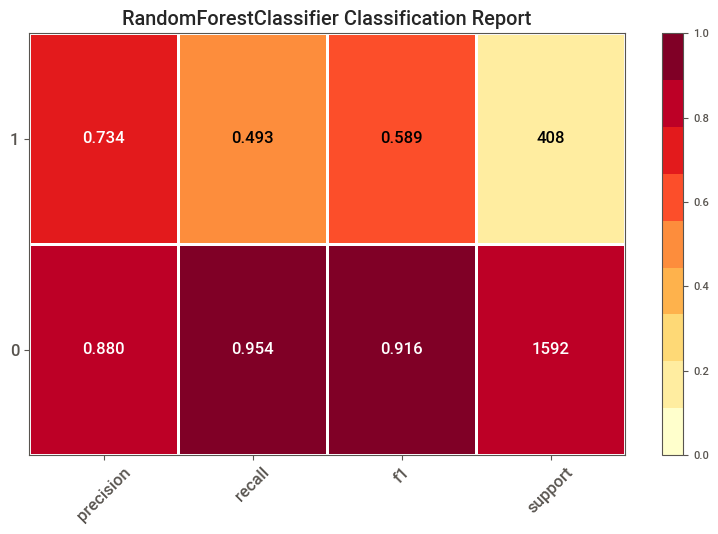

Показатель F1 валидационной выборки с настройками гиперпараметров модели CatBoost: 0.6116642958748222
Показатель AUC-ROC валидационной выборки с настройками гиперпараметров модели CatBoost: 0.7383547640161592


In [37]:
model_cat = CatBoostClassifier(random_state=12345, metric_period=10, verbose=10)
model_cat.fit(X_train, y_train)


valid_predictions = model_cat.predict(X_valid)
valid_f1_score = f1_score(y_valid, valid_predictions)
valid_roc_auc_score= roc_auc_score(y_valid, valid_predictions)

# Specify the target classes
classes = ["0","1"]

# Instantiate the classification model and visualizer
model = model_forest
visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_valid, y_valid)        # Evaluate the model on the valid data
visualizer.show()                       # Finalize and show the figure

print("Показатель F1 валидационной выборки с настройками гиперпараметров модели CatBoost:", valid_f1_score)
print("Показатель AUC-ROC валидационной выборки с настройками гиперпараметров модели CatBoost:", valid_roc_auc_score)
table_of_f1_score.append(round(valid_f1_score, 3))
table_of_roc_auc_score.append(round(valid_roc_auc_score, 3))
table_of_model.append('CatBoostClassifier')


Настройка гиперпараметров не дала возможность улучшить значения параметров модели, но мы достигли достаточно высокого значения F1 и хорошего значения AUC-ROC. Модель сбалансирована лучше, чем все рассмотренные модели.

In [38]:
table_of_models = (pd.DataFrame({' Модель':table_of_model, 'Показатель F1':table_of_f1_score,
                                 'Показатель AUC-ROC':table_of_roc_auc_score, }).
                         sort_values(by='Показатель F1', ascending=False).
                  reset_index(drop=True))
table_of_models

,Модель,Показатель F1,Показатель AUC-ROC
0,CatBoostClassifier,0.612,0.738
1,DecisionTreeClassifier,0.603,0.737
2,RandomForestClassifier,0.589,0.723
3,RandomForestClassifier,0.589,0.723
4,LogisticRegression,0.311,0.587


### Итоги исследования


В результате подбора модели удалсь выявить, что лидирует модель CatBoostClassifier с настройками гиперпараметров. Показатели модели: F1 = 0.612, AUC-ROC = 0.738. Остановимся на данном алгоритме и подобранных гиперпараметрах.


Так как существует дисбаланс классов целевого показателя, то мы попробуем найти метод, который позволит увеличить показатель F1.


Рассмотрим следующие методы:
1. RandomUnderSampler
4. Upsampling
    

## Борьба с дисбалансом
На данный момент распределение значений классов выглядит следующим образом:

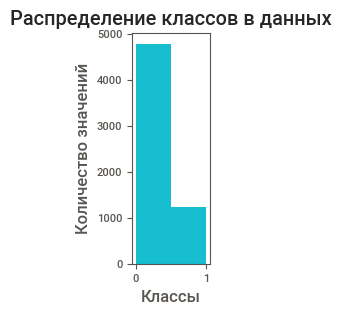

In [39]:
y_train.plot(kind ='hist', bins=2, figsize=(1,3), color='tab:cyan')
plt.title('Распределение классов в данных')
plt.xlabel('Классы')
plt.ylabel('Количество значений')
plt.show()

Если не бороться с дисбалансом, то модель будет перегружена бо́льшим классом, в следствии будет игнорировать меньший класс, неправильно классифицировать его, поскольку модели будет не хватать примеров и свойств редкого класса. Таким образом, несбалансированность классов напрямую влияет на точность и качество результатов машинного обучения. Попробуем подобать метод, который увеличит значение F1.

### метод RandomUnderSampler

In [40]:
ros = RandomUnderSampler(random_state=12345)
X_resampled_ros, y_resampled_ros = ros.fit_resample(X_train, y_train)
print("Original dataset:", sorted(Counter(y_train).items()))
print("Sampled dataset:", sorted(Counter(y_resampled_ros).items()))

Original dataset: [(0, 4778), (1, 1222)]
Sampled dataset: [(0, 1222), (1, 1222)]


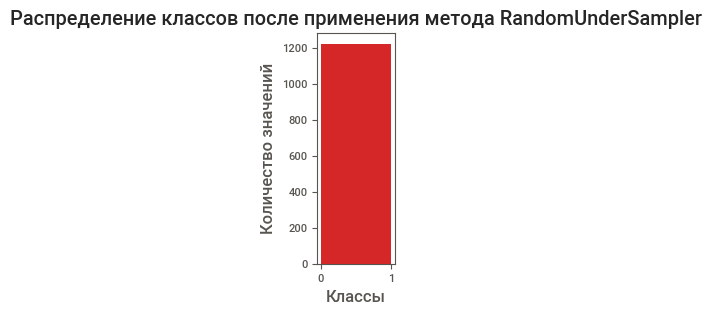

In [41]:
y_resampled_ros.plot(kind ='hist', bins=2, figsize=(1,3), color='tab:red')
plt.title('Распределение классов после применения метода RandomUnderSampler')
plt.xlabel('Классы')
plt.ylabel('Количество значений')
plt.show()

In [42]:
model_cat = CatBoostClassifier(random_state=12345, metric_period=10, verbose=10)
model_cat.fit(X_resampled_ros, y_resampled_ros)


valid_predictions = model_cat.predict(X_valid)
valid_f1_score = f1_score(y_valid, valid_predictions)
valid_roc_auc_score= roc_auc_score(y_valid, valid_predictions)


print("Показатель F1 валидационной выборки с настройками гиперпараметров модели CatBoost:", valid_f1_score)
print("Показатель AUC-ROC валидационной выборки с настройками гиперпараметров модели CatBoost:", valid_roc_auc_score)
table_of_f1_score.append(round(valid_f1_score, 3))
table_of_roc_auc_score.append(round(valid_roc_auc_score, 3))
table_of_model.append('CatBoostClassifier_ros')

Learning rate set to 0.015089
0:	learn: 0.6856829	total: 1.8ms	remaining: 1.8s
10:	learn: 0.6240217	total: 11.7ms	remaining: 1.05s
20:	learn: 0.5804225	total: 22.8ms	remaining: 1.06s
30:	learn: 0.5496830	total: 34.9ms	remaining: 1.09s
40:	learn: 0.5274147	total: 45.9ms	remaining: 1.07s
50:	learn: 0.5095767	total: 57.2ms	remaining: 1.06s
60:	learn: 0.4968975	total: 68.5ms	remaining: 1.05s
70:	learn: 0.4869464	total: 79.7ms	remaining: 1.04s
80:	learn: 0.4775882	total: 90ms	remaining: 1.02s
90:	learn: 0.4704458	total: 101ms	remaining: 1s
100:	learn: 0.4639945	total: 112ms	remaining: 994ms
110:	learn: 0.4583091	total: 123ms	remaining: 983ms
120:	learn: 0.4534565	total: 135ms	remaining: 984ms
130:	learn: 0.4489876	total: 145ms	remaining: 965ms
140:	learn: 0.4454774	total: 156ms	remaining: 950ms
150:	learn: 0.4421114	total: 168ms	remaining: 943ms
160:	learn: 0.4390283	total: 178ms	remaining: 930ms
170:	learn: 0.4360242	total: 189ms	remaining: 917ms
180:	learn: 0.4327779	total: 202ms	remainin

Рассмотренный метод борьбы с дисбалансом позволил увеличить значения показателей F1 и AUC-ROC.


### метод Upsampling

In [43]:
features_zeros = X_train[y_train == 0]
features_ones = X_train[y_train == 1]
target_zeros = y_train[y_train == 0]
target_ones = y_train[y_train == 1]

repeat = 4
X_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
y_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

X_upsampled, y_upsampled = shuffle(X_upsampled, y_upsampled, random_state=12345)

print(X_upsampled.shape)
print(y_upsampled.shape)

(9666, 8)
(9666,)


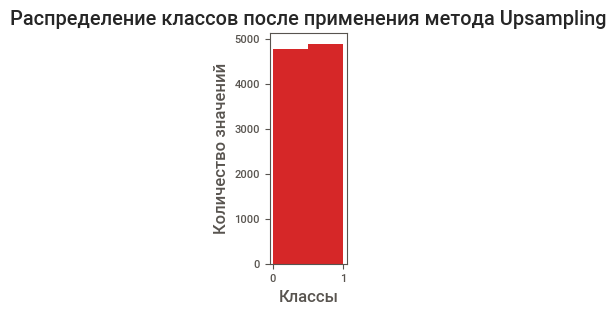

In [44]:
y_upsampled.plot(kind ='hist', bins=2, figsize=(1,3), color='tab:red')
plt.title('Распределение классов после применения метода Upsampling')
plt.xlabel('Классы')
plt.ylabel('Количество значений')
plt.show()

In [45]:
model_cat = CatBoostClassifier(random_state=12345, metric_period=10, verbose=10)
model_cat.fit(X_upsampled, y_upsampled)


valid_predictions = model_cat.predict(X_valid)
valid_f1_score = f1_score(y_valid, valid_predictions)
valid_roc_auc_score= roc_auc_score(y_valid, valid_predictions)


print("Показатель F1 валидационной выборки с настройками гиперпараметров модели CatBoost:", valid_f1_score)
print("Показатель AUC-ROC валидационной выборки с настройками гиперпараметров модели CatBoost:", valid_roc_auc_score)
table_of_f1_score.append(round(valid_f1_score, 3))
table_of_roc_auc_score.append(round(valid_roc_auc_score, 3))
table_of_model.append('CatBoostClassifier_upsampled')

Learning rate set to 0.027142
0:	learn: 0.6787835	total: 1.97ms	remaining: 1.97s
10:	learn: 0.5788050	total: 22ms	remaining: 1.98s
20:	learn: 0.5274897	total: 41ms	remaining: 1.91s
30:	learn: 0.5013691	total: 62.9ms	remaining: 1.97s
40:	learn: 0.4839249	total: 83.3ms	remaining: 1.95s
50:	learn: 0.4713141	total: 105ms	remaining: 1.96s
60:	learn: 0.4625346	total: 126ms	remaining: 1.94s
70:	learn: 0.4547985	total: 149ms	remaining: 1.95s
80:	learn: 0.4483344	total: 169ms	remaining: 1.92s
90:	learn: 0.4431229	total: 195ms	remaining: 1.95s
100:	learn: 0.4382044	total: 216ms	remaining: 1.92s
110:	learn: 0.4343744	total: 237ms	remaining: 1.9s
120:	learn: 0.4310469	total: 259ms	remaining: 1.88s
130:	learn: 0.4275510	total: 281ms	remaining: 1.86s
140:	learn: 0.4254601	total: 302ms	remaining: 1.84s
150:	learn: 0.4227226	total: 322ms	remaining: 1.81s
160:	learn: 0.4200687	total: 344ms	remaining: 1.79s
170:	learn: 0.4171419	total: 367ms	remaining: 1.78s
180:	learn: 0.4148897	total: 387ms	remaining:

При использовании данного метода удалось получить еще большее значение F1 и AUC-ROC.

### Итоги устранения дисбаланса
1. устранение дисбаланса между классами значений целевой переменной способствует получению лучших значений параметров модели: показателей F1 и AUC-ROC.
2. для модели CatBoost, на основании значения параметра F1, достигается высокое значение при использовании метода устранения дисбаланса - Upsampling. Показатель F1 - 0.6477987421383647. Значения показателя AUC-ROC полувено выше, чем без устранения дисбаланса - 0.8042417972214011.

Далее тестирование лучшей модели и проверим адекватность модели.

## Тестирование модели

In [46]:
model_cat = CatBoostClassifier(random_state=12345, metric_period=10, verbose=10)
model_cat.fit(X_upsampled, y_upsampled)


test_predictions = model_cat.predict(X_test)
test_f1_score = f1_score(y_test, test_predictions)
test_roc_auc_score= roc_auc_score(y_test, valid_predictions)
test_acc = accuracy_score(y_test, test_predictions)


print("Показатель F1 тестовой выборки :", test_f1_score)
print("Показатель AUC-ROC тестовой выборки:", test_roc_auc_score)
print("Показатель accuracy тестовой выборки:", test_acc)

Learning rate set to 0.027142
0:	learn: 0.6787835	total: 1.75ms	remaining: 1.75s
10:	learn: 0.5788050	total: 34.5ms	remaining: 3.1s
20:	learn: 0.5274897	total: 55.1ms	remaining: 2.57s
30:	learn: 0.5013691	total: 77.1ms	remaining: 2.41s
40:	learn: 0.4839249	total: 98.9ms	remaining: 2.31s
50:	learn: 0.4713141	total: 120ms	remaining: 2.24s
60:	learn: 0.4625346	total: 140ms	remaining: 2.16s
70:	learn: 0.4547985	total: 162ms	remaining: 2.11s
80:	learn: 0.4483344	total: 184ms	remaining: 2.09s
90:	learn: 0.4431229	total: 203ms	remaining: 2.03s
100:	learn: 0.4382044	total: 226ms	remaining: 2.01s
110:	learn: 0.4343744	total: 248ms	remaining: 1.99s
120:	learn: 0.4310469	total: 269ms	remaining: 1.96s
130:	learn: 0.4275510	total: 291ms	remaining: 1.93s
140:	learn: 0.4254601	total: 312ms	remaining: 1.9s
150:	learn: 0.4227226	total: 332ms	remaining: 1.87s
160:	learn: 0.4200687	total: 353ms	remaining: 1.84s
170:	learn: 0.4171419	total: 376ms	remaining: 1.82s
180:	learn: 0.4148897	total: 396ms	remaini

Тестирование модели показало удовлетворительный результат: F1 > 0,59.


Проведем проверку модели на адекватность.

### ROC-кривая обученой модели

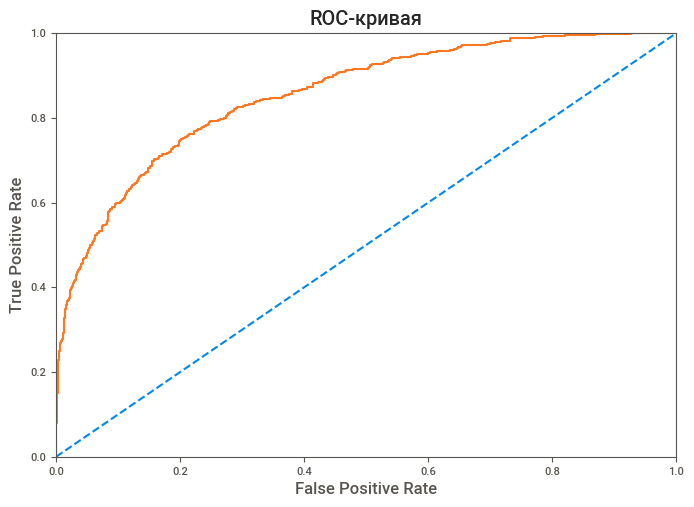

In [47]:
probabilities_valid = model_cat.predict_proba(X_test)
probabilities_one_valid = probabilities_valid[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_valid)

plt.figure()

# ROC-кривая случайной модели
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)
plt.ylim([0.0, 1])
plt.xlim([0.0, 1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()


График показывает значительное откланение ROC-кривая обученой модели от  ROC-кривая случайной модели. Полученное значение на тестовой выборке AUC-ROC = 0.77, что больше AUC-ROC случайной модели, равное 0,5. 

### Проверка модели на адекватность

Проверим модели на адекватность. Для это построим случайную модель на основе DummyClassifier.DummyClassifier-это классификатор,который делает прогнозы,используя простые правила. Классификатор полезен в качестве простой основы для сравнения с другими (реальными)классификаторами.

Рассмотрим значения точности различных стратегий для данного алгоритма и сравним результаты с точностью модели CatBoost:

In [48]:
strategies = ['most_frequent', 'prior', 'stratified', 'uniform', 'constant']
dummies_result = []
for strat in strategies:
    dc = DummyClassifier(random_state=12345)
    dc.fit(X_train, y_train)
    res = dc.score(X_test, y_test)
    dummies_result.append({strat:res})

pd.DataFrame(dummies_result).fillna(0)

,most_frequent,prior,stratified,uniform,constant
0,0.7965,0.0000,0.0000,0.0000,0.0000
1,0.0000,0.7965,0.0000,0.0000,0.0000
2,0.0000,0.0000,0.7965,0.0000,0.0000
3,0.0000,0.0000,0.0000,0.7965,0.0000
4,0.0000,0.0000,0.0000,0.0000,0.7965


Из таблицы, мы видим, что с помощью DummyClassifier мы получили максимальное значение 0.7965. Точность CatBoost значительно выше - 0.814. Делаем вывод, что обученная нами модель прошла проверку на адекватность.

### Итоги тестирования модели
Для проведения тестирования была выбрана модель CatBoostClassifier со значениями показателей: F1 = 0.642, AUC-ROC =	0.800, с применением метода устранения дисбаланса классов целевого показателя - Upsampling. По итогам тестирования модель показала удовлетворительный результат: F1 = 0.6. Модель CatBoostClassifier показывает результат выше чем случайная модель: AUC-ROC = 0.77. Обученная нами модель прошла проверку на адекватность.

## Общий вывод

Ознакомление с данными показало: что данные, содержат 14 признаков из которых целевой признак Exited — факт ухода клиента. Типы переменных: числовые - 7, категориальные - 7. Количество наблюдений - 10000. Пропуски в столбце Tenure — сколько лет человек является клиентом банка. Количество пропусков - 909 - 9,1% пропусков в столбце. Отсутствие дубликатов. Изучили значения целевого признака, который имеет 2 значения - 0 и 1(со значением 0 признака Exited - 7963 шт. - 79.6%, данных со значением 1 - 2037 шт. - 20.4%). Выявили дисбаланс классов в значениях признака Exited. Значения признака Surname — фамилия, RowNumber — индекс строки в данных и CustomerId — уникальный идентификатор клиента нам не потребуются для дальнейшей работы. Анализ корреляции признаков с целевым признаком на основании коэффициент корреляции Phik (𝜙k), заключили, что существует крайне слабая корреляция Exited с признаками: RowNumber — индекс строки в данных, CustomerId — уникальный идентификатор клиента, Tenure — сколько лет человек является клиентом банка, HasCrCard — наличие кредитной карты, EstimatedSalary — предполагаемая зарплата. При проверке на мультиколлинеарность — не было выявлено наличия сильной корреляции между несколькими не целевыми признаками. Были удалены столбцы:'RowNumber', 'CustomerId', 'Surname', 'Tenure', 'HasCrCard', 'EstimatedSalary'. Удаление данных признаков снизило нагрузку при обучении моделей. Для столбцов Geography — (3 уникальных значения France', 'Spain', 'Germany') и Gender -(2 уникальных значения) — выполно преобразовываем категориальные переменные в фиктивные переменные , которые представляют собой числовые переменные, используемые для представления категориальных данных. Разделили данные на выборки: тестовую, валидационную, для обучения. Произвели масштабирование признаков так как признаки измерялись в разных единицах, а значит покрывали разные диапазоны, что могло сильно исказить результаты алгоритмов, которые учитывают расстояния между измерениями. Данные были подготовлены для исследования. 

В результате иссленования, были проанализиованы модели машинного обучения: логистическая регрессия; деревья решений; случайный лес; CatBoost. Подобраны гиперпараметры для этих моделий. Для каждой модели были определены такие параметры как: precision (точность),
recall (полнота), F1-score (f-мера), площадь под ROC-кривой — AUC-ROC. Лучшей оказалась модель CatBoostClassifier с настройками гиперпараметров. Показатели модели: F1 = 0.612, AUC-ROC = 0.738. 


Так как был выявлен дисбаланс классов целевого показателя, то мы нашли метод, который позволил увеличить показатель F1. Были рассмотрены методы: RandomUnderSampler, Upsampling. Для модели CatBoost, на основании значения параметра F1, был выбран метода устранения дисбаланса - Upsampling. Значения показателя F1 - 0.6415882967607105. Значения показателя AUC-ROC полувено - 0.8002204650704503.

Рейтинг рассмотреных моделей и методов:

In [49]:
table_of_models = (pd.DataFrame({' Модель':table_of_model, 'Показатель F1':table_of_f1_score,'Показатель AUC-ROC':table_of_roc_auc_score, }).
                         sort_values(by='Показатель F1', ascending=False).
                  reset_index(drop=True))
table_of_models

,Модель,Показатель F1,Показатель AUC-ROC
0,CatBoostClassifier_upsampled,0.648,0.804
1,CatBoostClassifier_ros,0.623,0.804
2,CatBoostClassifier,0.612,0.738
3,DecisionTreeClassifier,0.603,0.737
4,RandomForestClassifier,0.589,0.723
5,RandomForestClassifier,0.589,0.723
6,LogisticRegression,0.311,0.587


По итогам тестирования модель показала удовлетворительный результат: F1 = 0.6. На графике ROC-кривая обученой модели CatBoostClassifier со значением AUC-ROC = 0.77 показала нам, что площадь под кривой намного выше площади дефолтной модели. Обученная нами модель прошла проверку на адекватность.

Данная модель может быть использована для задачи классификации, которая спрогнозирeт, уйдёт клиент из банка в ближайшее время или нет.
